In [18]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

In [27]:
df3 = pd.read_csv("Telco_Customer_Churn.csv")
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
df3.drop(["customerID"], axis="columns", inplace=True)
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [30]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [31]:
df3["TotalCharges"] = pd.to_numeric(df3["TotalCharges"], errors="coerce")

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [32]:
df3.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [34]:
df3.dropna(inplace=True)

In [35]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### EDA

In [36]:
gender_df = df3.groupby("gender").count()["Churn"]
gender_df

gender
Female    3483
Male      3549
Name: Churn, dtype: int64

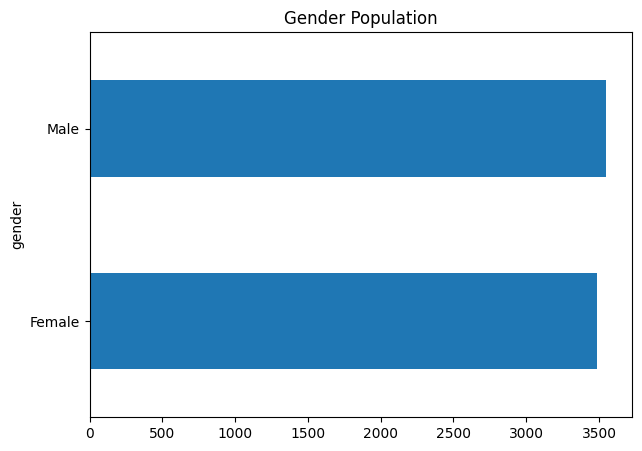

In [37]:
plt.figure(figsize=(7, 5))
gender_df.plot.barh()
plt.title("Gender Population")
plt.show()

In [38]:
churn_df = df3.groupby("Churn")[["gender", "SeniorCitizen"]].count()
churn_df

,gender,SeniorCitizen
Churn,,
No,5163,5163
Yes,1869,1869


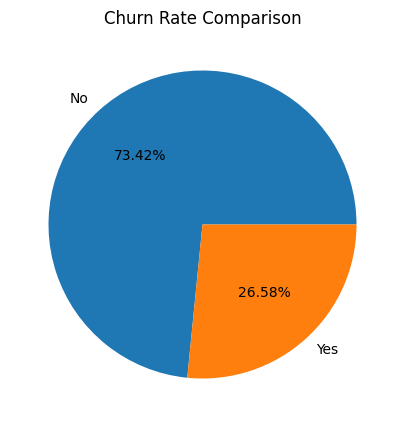

In [39]:
plt.figure(figsize=(7, 5))
plt.pie(x="gender", data=churn_df, autopct="%1.2f%%", labels= churn_df.index)
plt.title("Churn Rate Comparison")
plt.show()

In [40]:
payment_df = df3.groupby('PaymentMethod')['Churn'].value_counts()
payment_df

PaymentMethod              Churn
Bank transfer (automatic)  No       1284
                           Yes       258
Credit card (automatic)    No       1289
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1296
                           Yes       308
Name: count, dtype: int64

In [ ]:
# df3 = pd.read_csv("Telco_Customer_Churn.csv")
df3.head()
df3['Churn'] = df3['Churn'].map({'Yes': 1, 'No': 0}).astype('Int64')
df3["Churn"].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: Int64

In [42]:
payment_df = df3.groupby('PaymentMethod')['Churn'].value_counts()
payment_df1 = df3.groupby('PaymentMethod').count()['Churn']
payment_df1

PaymentMethod
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
Name: Churn, dtype: Int64

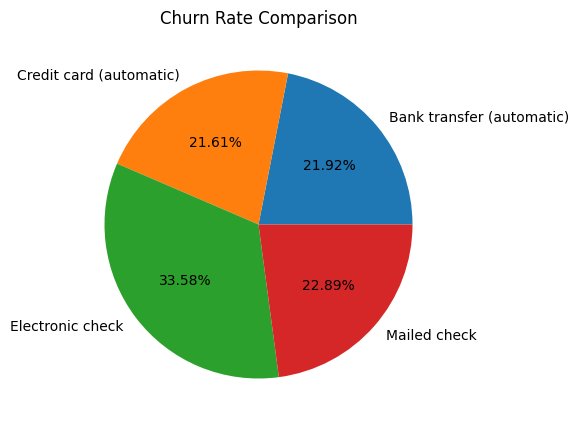

In [43]:
plt.figure(figsize=(7, 5))
plt.pie(x=payment_df1, autopct="%1.2f%%", labels= payment_df1.index)
plt.title("Churn Rate Comparison")
plt.show()

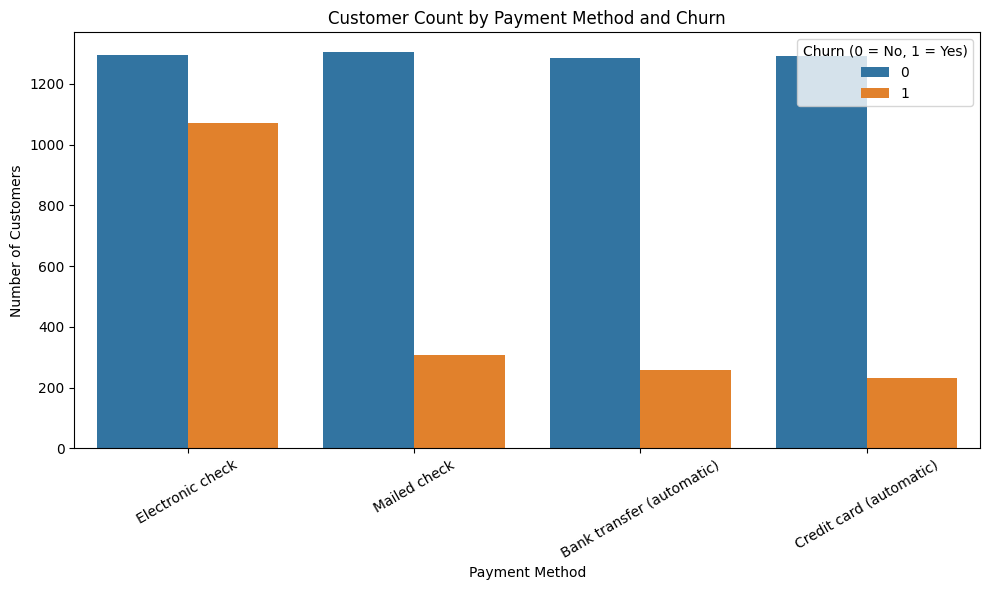

In [44]:
interest_feature_cols = ["TotalCharges", "MonthlyCharges"]

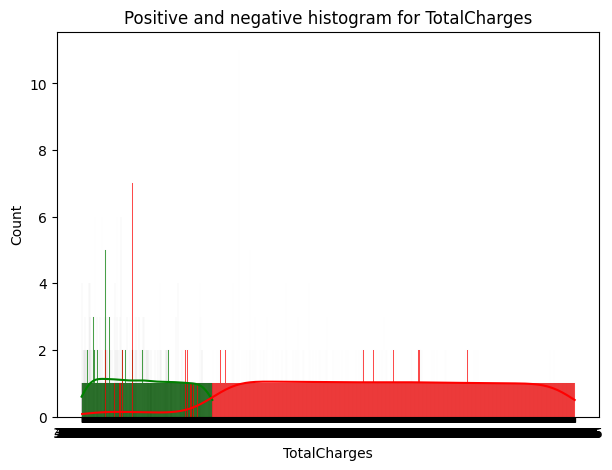

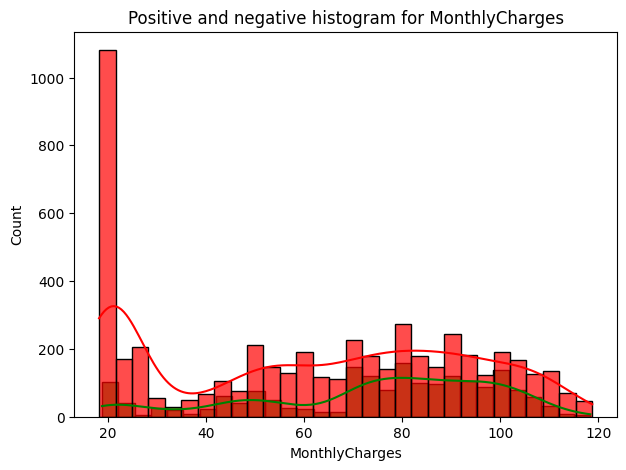

In [48]:
for feature_col in interest_feature_cols:
    pos_data = df3[df3["Churn"] == 1][feature_col]
    neg_data = df3[df3["Churn"] == 0][feature_col]

    plt.figure(figsize=(7, 5))
    sns.histplot(pos_data, bins=30, alpha=0.7, label="1", color="green", kde=True)
    sns.histplot(neg_data, bins=30, alpha=0.7, label="0", color="red", kde=True)
    plt.title(f"Positive and negative histogram for {feature_col}")
    plt.show()

In [50]:
for column in df3:
    print(f"{column}: {df3[column].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [51]:
from sklearn.preprocessing import LabelEncoder

In [53]:
df3_copy = df3.copy()
df3_copy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [54]:
label_encoder = LabelEncoder()
for cat_col in df3.select_dtypes("object").columns:
    if len(df3[cat_col].unique()) == 2:
        df3[cat_col] = label_encoder.fit_transform(df3[cat_col])
    else:
        df3 = pd.get_dummies(data= df3, columns=[cat_col])
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,0,1,0,1,0,1,29.85,0,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,0,34,1,0,56.95,0,True,...,False,False,False,False,False,False,False,False,False,False
2,1,0,0,0,2,1,1,53.85,1,True,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,0,45,0,0,42.30,0,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,0,2,1,1,70.70,1,True,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df3.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'Churn',
       'MultipleLines_No',
       ...
       'TotalCharges_995.35', 'TotalCharges_996.45', 'TotalCharges_996.85',
       'TotalCharges_996.95', 'TotalCharges_997.65', 'TotalCharges_997.75',
       'TotalCharges_998.1', 'TotalCharges_999.45', 'TotalCharges_999.8',
       'TotalCharges_999.9'],
      dtype='object', length=6571)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df3.drop(['Churn'], axis="columns")
y = df3['Churn']

In [58]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,0,1,0,1,0,1,29.85,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,0,34,1,0,56.95,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0,0,0,2,1,1,53.85,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,0,45,0,0,42.30,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,0,2,1,1,70.70,True,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=800)
X_train.shape

(5634, 6570)

In [60]:
X_test.shape

(1409, 6570)

In [69]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,0,1,0,1,0,1,29.85,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,0,34,1,0,56.95,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0,0,0,2,1,1,53.85,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,0,45,0,0,42.30,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,0,2,1,1,70.70,True,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
X.dtypes

gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
                       ...  
TotalCharges_997.75     bool
TotalCharges_998.1      bool
TotalCharges_999.45     bool
TotalCharges_999.8      bool
TotalCharges_999.9      bool
Length: 6570, dtype: object

In [71]:
# After get_dummies
X_train = pd.get_dummies(X_train, drop_first=True)
X_test  = pd.get_dummies(X_test, drop_first=True)

# Align columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Convert EVERYTHING to float
X_train = X_train.astype("float32")
X_test  = X_test.astype("float32")

# Ensure labels are numeric
y_train = y_train.astype("float32")
y_test  = y_test.astype("float32")


In [72]:
print(X_train.dtypes.unique())


[dtype('float32')]


In [61]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [73]:
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices"

In [86]:
# model = Sequential(
#     [Dense(units=40, input_shape = (40, ), activation="relu"),
#     Dense(units=15, activation="relu"),
#     Dense(units=1, activation="sigmoid")]
# )

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [87]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [84]:
X_train.shape


(5634, 6570)

In [88]:
model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=80,
    batch_size=32
)


Epoch 1/80
177/177 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.7891 - loss: 0.4446 - val_accuracy: 0.7743 - val_loss: 0.4752
Epoch 2/80
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7978 - loss: 0.4342 - val_accuracy: 0.7921 - val_loss: 0.4276
Epoch 3/80
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8179 - loss: 0.3954 - val_accuracy: 0.7793 - val_loss: 0.4470
Epoch 4/80
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8257 - loss: 0.3826 - val_accuracy: 0.7942 - val_loss: 0.4241
Epoch 5/80
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8536 - loss: 0.3373 - val_accuracy: 0.8062 - val_loss: 0.4152
Epoch 6/80
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8862 - loss: 0.2823 - val_accuracy: 0.7679 - val_loss: 0.6036
Epoch 7/80
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9313 - loss: 0.1950 - val_accuracy: 0.7779 - val_loss: 0.5417
Epoch 8/80
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9666 - loss: 0.1017 - val_accura

In [90]:
model.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7211 - loss: 0.8219


[0.8219448328018188, 0.7210787534713745]

In [103]:
y_pred = model.predict(X_test)
y_pred[0]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([0.04893493], dtype=float32)

In [104]:
y_pred = [1 if prediction > 0.5 else 0 for prediction in y_pred]
y_pred[0]

0

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81      1019
         1.0       0.50      0.52      0.51       390

    accuracy                           0.72      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.73      0.72      0.72      1409



In [106]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[813, 206],
       [187, 203]])

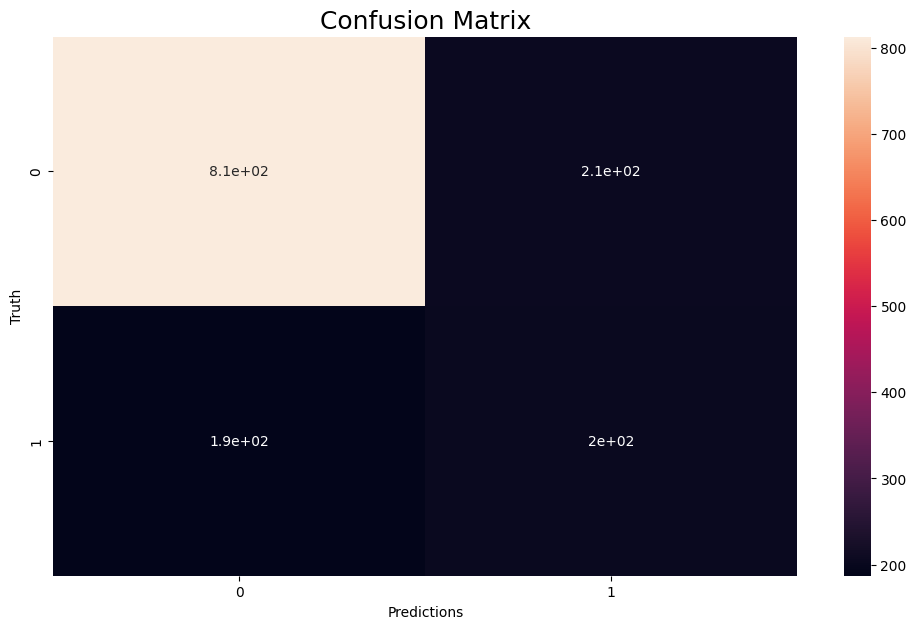

In [107]:
plt.figure(figsize=(12, 7))
plt.title("Confusion Matrix", fontsize= 18)
sns.heatmap (cm, annot = True)
plt.xlabel("Predictions")
plt.ylabel("Truth")
plt.show()